Número de entradas incorrectas: 0


C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Entrenamiento de datos únicamente despúes del punto de inflexión
fbt2(x)= 
 
1.13 x - 8066
fbt2(x)-7,000= 
 
1.13 x - 1.507e+04


C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


 
1.13 x - 8066
 
1.13 x - 1.507e+04

7,000 pesos esperados esperados para 18.265391


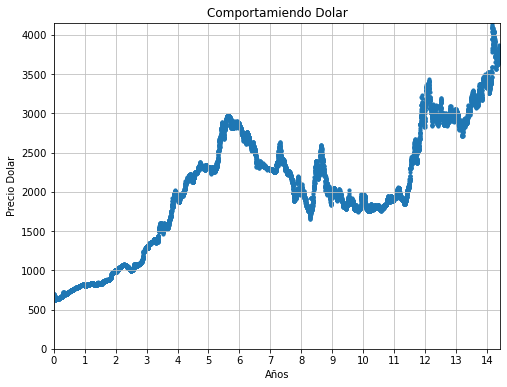

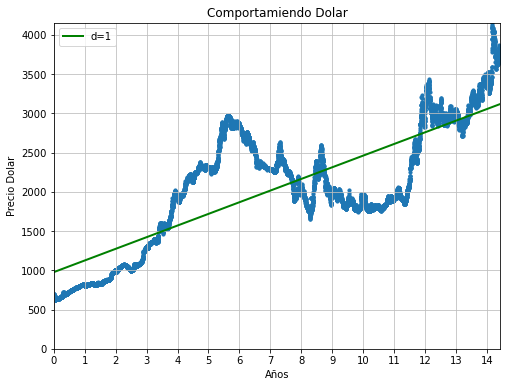

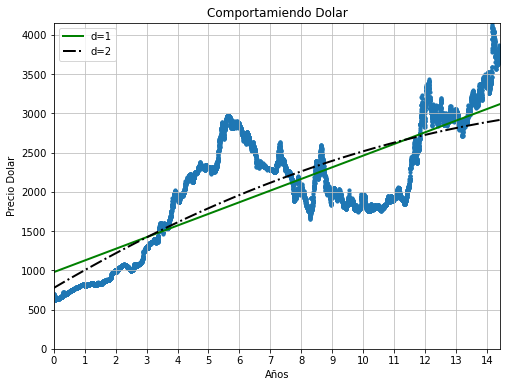

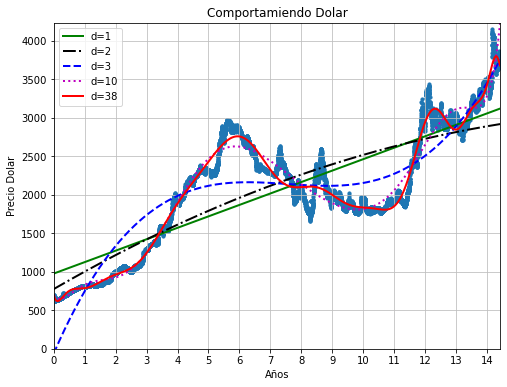

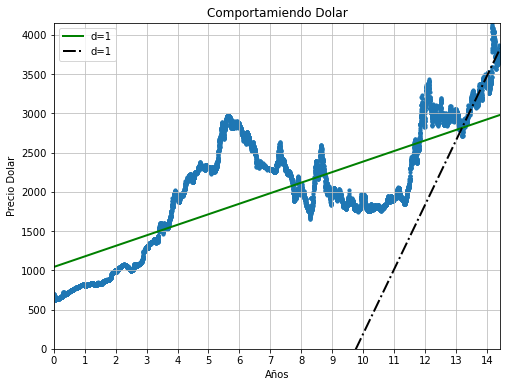

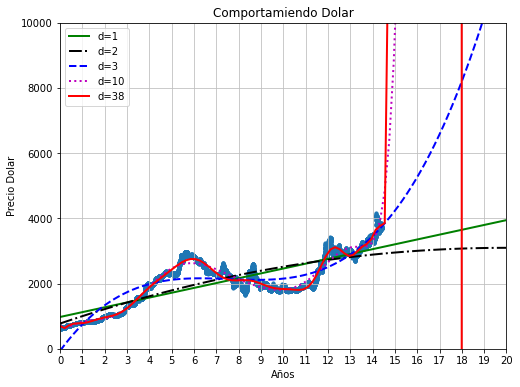

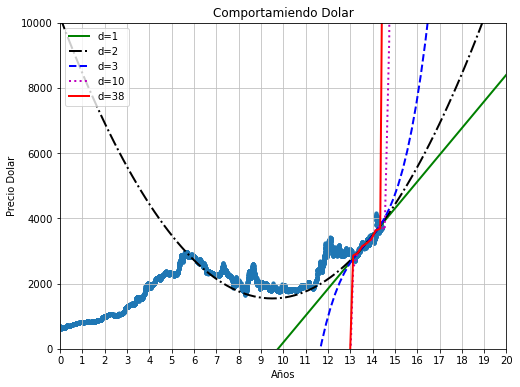

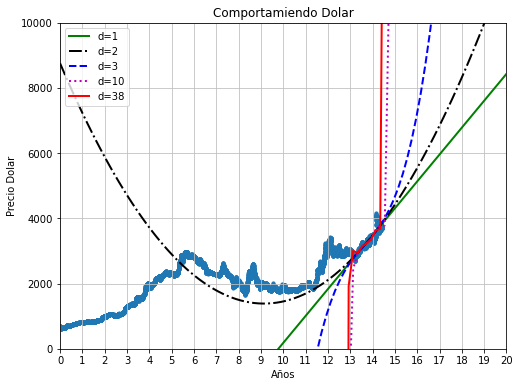

In [4]:
from utils import DATA_DIR, CHART_DIR
import os
import numpy as np
import pandas as pd
import datetime as dt
import scipy as sp
import matplotlib.pyplot as plt
# Se eliminan las advertencias por el uso de funciones que
# en el futuro cambiarán
# -----------------------------------------------------------------
np.seterr(all='ignore')

# Datos de trabajo
# -----------------------------------------------------------------
data = pd.read_csv("DatosDolar.tsv", sep = "\t")

#print(data, '\n')


prices = data.Price
prices = np.array(prices, dtype=np.str)
prices = [prices_.replace(',','.') for prices_ in prices]
prices = np.array(prices, dtype=np.float64)
#print(prices, '\n')
#print(prices.shape, '\n')
dates = pd.to_datetime(data['Date'], format='%d/%m/%Y').dt.strftime('%Y')
dates = np.array(dates, dtype='int')
#print(dates, '\n')
#print(dates.shape, '\n')

# Todos los ejemplos tienen tres clases en este archivo
# -----------------------------------------------------------------
colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']



print("Número de entradas incorrectas:", np.sum(np.isnan(prices)))



# CON ESTA FUNCIÓN SE DEFINE UN MODELO, EL CUAL CONTIENE
# el comportamiento de un ajuste con base en un grado polinomial
# elegido
# -----------------------------------------------------------------
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    ''' dibujar datos de entrada '''
    plt.figure(num=None, figsize=(8, 6))
    plt.clf()
    plt.scatter(x, y, s=10)
    plt.title("Comportamiendo Dolar")
    plt.xlabel("Años")
    plt.ylabel("Precio Dolar")
    plt.xticks([w*365*2 for w in range(29)],['%i' % w for w in range(29)])
    if models:
        if mx is None:
            mx = np.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)
    
        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)

# Primera mirada a los datos
# -----------------------------------------------------------------
years = [m for m in range(len(dates))]
plot_models(years, prices, None, os.path.join(CHART_DIR, "01_Datos.png"))

# Crea y dibuja los modelos de datos
# -----------------------------------------------------------------
fp1, res1, rank1, sv1, rcond1 = np.polyfit(years, prices, 1, full=True)
#print("Parámetros del modelo fp1: %s" % fp1)
#print("Error del modelo fp1:", res1)
f1 = sp.poly1d(fp1)

fp2, res2, rank2, sv2, rcond2 = np.polyfit(years, prices, 2, full=True)
#print("Parámetros del modelo fp2: %s" % fp2)
#print("Error del modelo fp2:", res2)
f2 = sp.poly1d(fp2)

f3 = sp.poly1d(np.polyfit(years, prices, 3))
f10 = sp.poly1d(np.polyfit(years, prices, 10))
f70 = sp.poly1d(np.polyfit(years, prices, 70))

# Se grafican los modelos
# -----------------------------------------------------------------
plot_models(years, prices, [f1], os.path.join(CHART_DIR, "02_Modelo Lineal.png"))
plot_models(years, prices, [f1, f2], os.path.join(CHART_DIR, "03_Cuadratico y lineal.png"))
plot_models(
    years, prices, [f1, f2, f3, f10, f70], os.path.join(CHART_DIR,
                                                "04_Todos los modelos.png"))

# Ajusta y dibuja un modelo utilizando el conocimiento del punto
# de inflexión
# -----------------------------------------------------------------
years = np.array(years, dtype='int')
inflexion = 13.2 * 365 * 2
xa = years[:int(inflexion)]
ya = prices[:int(inflexion)]
xb = years[int(inflexion):]
yb = prices[int(inflexion):]

# Se grafican dos líneas rectas
# -----------------------------------------------------------------
fa = sp.poly1d(np.polyfit(xa, ya, 1))
fb = sp.poly1d(np.polyfit(xb, yb, 1))

# Se presenta el modelo basado en el punto de inflexión
# -----------------------------------------------------------------
plot_models(years, prices, [fa, fb], os.path.join(CHART_DIR, "05_Modelo punto de inflexion.png"))

# Función de error
# -----------------------------------------------------------------
def error(f, years, prices):
    return np.sum((f(years) - prices) ** 2)

# Se imprimen los errores
# -----------------------------------------------------------------
#print("Errores para el conjunto completo de datos:")
#for f in [f1, f2, f3, f10, f70]:
    #print("Error d=%i: %f" % (f.order, error(f, years, prices)))
    
#print("Errores solamente después del punto de inflexión")
#for f in [f1, f2, f3, f10, f70]:
    #print("Error d=%i: %f" % (f.order, error(f, xb, yb)))
    
#print("Error de inflexión=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))

# Se extrapola de modo que se proyecten respuestas en el futuro
# -----------------------------------------------------------------
plot_models(
    years, prices, [f1, f2, f3, f10, f70],
    os.path.join(CHART_DIR, "06_Proyecciones a futuro.png"),
    mx=np.linspace(0 * 365 * 2, 20 * 365 * 2, 100),
    ymax=10000, xmin=0 * 365 * 2)

print("Entrenamiento de datos únicamente despúes del punto de inflexión")
fb1 = fb
fb2 = sp.poly1d(np.polyfit(xb, yb, 2))
fb3 = sp.poly1d(np.polyfit(xb, yb, 3))
fb10 = sp.poly1d(np.polyfit(xb, yb, 10))
fb70 = sp.poly1d(np.polyfit(xb, yb, 70))

#print("Errores después del punto de inflexión")
#for f in [fb1, fb2, fb3, fb10, fb70]:
    #print("Error d=%i: %f" % (f.order, error(f, xb, yb)))
    
# Gráficas después del punto de inflexión
# -----------------------------------------------------------------
plot_models(
    years, prices, [fb1, fb2, fb3, fb10, fb70],
    os.path.join(CHART_DIR, "07_Graficas despues del punto de inflexion.png"),
    mx=np.linspace(0 * 365 * 2, 20 * 365 * 2, 100),
    ymax=10000, xmin=0 * 365 * 2)

# Separa el entrenamiento de los datos de prueba
# -----------------------------------------------------------------
frac = 0.2
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = sp.poly1d(np.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(np.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt1)
print("fbt2(x)-7,000= \n%s" % (fbt1-7000))
fbt3 = sp.poly1d(np.polyfit(xb[train], yb[train], 3))

fbt10 = sp.poly1d(np.polyfit(xb[train], yb[train], 10))
fbt70 = sp.poly1d(np.polyfit(xb[train], yb[train], 70))

#print("Prueba de error para después del punto de inflexión")
#for f in [fbt1, fbt2, fbt3, fbt10, fbt70]:
    #print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))
    
plot_models(
    years, prices, [fbt1, fbt2, fbt3, fbt10, fbt70],
    os.path.join(CHART_DIR, "08_Grafica final.png"),
    mx=np.linspace(0 * 365 * 2, 20 * 365 * 2, 100),
    ymax=10000, xmin=0 * 365 * 2)
from scipy.optimize import fsolve
print(fbt1)
print(fbt1 - 7000)
alcanzado_max = fsolve(fbt1 - 7000, x0=13.2 * 365 * 2) / (365 * 2)
print("\n7,000 pesos esperados esperados para %f" %
        alcanzado_max[0])